<a href="https://colab.research.google.com/github/Mtiwari27/Mukund_Bharat-Intern/blob/main/BharatIntern_03Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name :- Mukund Tiwari
Role/Position :- Machine Learning Intern

**Iris Classification**

Develop a ML Model for classifying iris flowers based on their features using
Python, scikit-learn, and TensorFlow.

In [121]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data=pd.read_csv('/content/Iris.csv')

In [123]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [124]:
data.drop(['Id'],axis=1,inplace=True)

In [125]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [127]:
data.drop(['SepalWidthCm'],axis=1,inplace=True)
data.drop(['PetalWidthCm'],axis=1,inplace=True)

In [128]:
data.head()

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


In [129]:
data.describe()

,SepalLengthCm,PetalLengthCm
count,150.000000,150.000000
mean,5.843333,3.758667
std,0.828066,1.764420
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


In [130]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: >

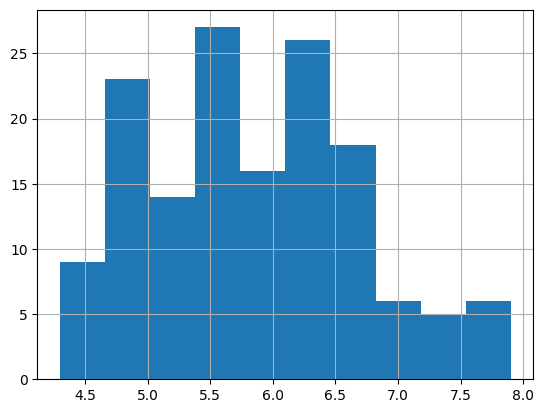

In [131]:
#histogram plot
data['SepalLengthCm'].hist()

<Axes: >

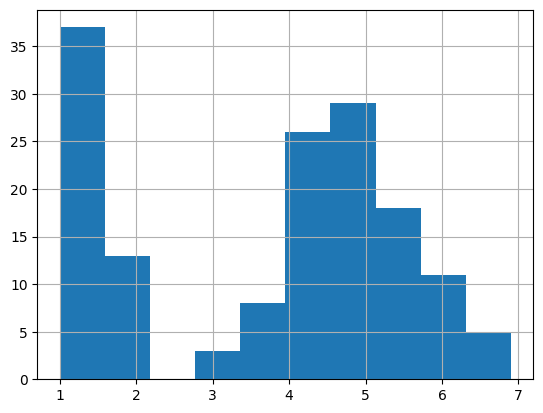

In [132]:
data['PetalLengthCm'].hist()

In [133]:
#scatter plot
colors=['red','yellow','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

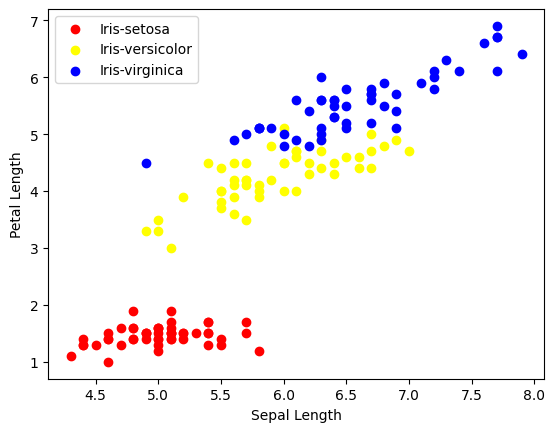

In [134]:
for i in range(0,3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

In [135]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [136]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

In [137]:
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

In [138]:
data

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


<Axes: >

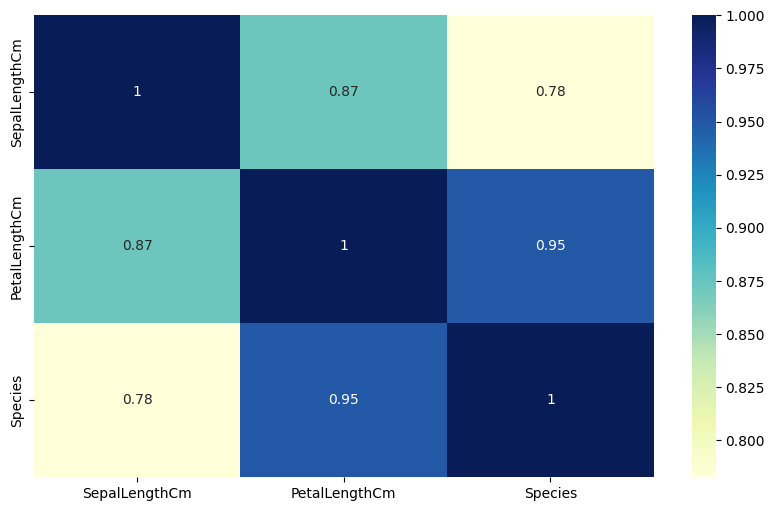

In [139]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

## Model Training



In [140]:
from sklearn.model_selection import train_test_split as tts

In [141]:
X=data.drop(['Species'],axis=1)
y=data['Species']

In [142]:
X_train, X_test,y_train,y_test=tts(X,y,test_size=0.25)

**Linear regression**

In [143]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8883211336812734

**Logistic Regression**

In [144]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9473684210526315

**Decision Tree Classification**

In [145]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9210526315789473